In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from tifffile import imread

In [2]:
input_path = '/home/unix/jiahao/wanglab/Data/Analyzed/2024-02-28-Mingrui-4-DEG_pilot_test'
signal_path = os.path.join(input_path, 'signal')

In [4]:
tif_tile = [f for f in os.listdir(signal_path) if f.endswith('.tif')]

In [7]:
for i in range(1, 1124):
    current_position = f"Position{i:03d}_allSpots.tif"
    if current_position not in tif_tile:
        print(f"Position{i:03d}.tif is missing")    

Position271.tif is missing


In [5]:
def load_reads(reads_file):
    S = loadmat(os.path.join(reads_file))
    bases = [str(i[0][0]) for i in S["merged_reads"]]
    points = S["merged_points"][:, :2]
    temp = np.zeros(points.shape)
    temp[:, 0] = np.round(points[:, 1]-1)
    temp[:, 1] = np.round(points[:, 0]-1)
    
    print(f"Number of reads: {len(bases)}")
    
    return bases, temp

In [27]:
mat_file = '/home/unix/jiahao/wanglab/Mingrui/starfinder/2023-09-19-Mingrui-Mouse-SCN-120Gene/sample14/02_registration/merged_goodPoints_max3d.mat'
bases, points = load_reads(mat_file)

Number of reads: 203687


In [28]:
overlay = imread('/home/unix/jiahao/wanglab/Mingrui/starfinder/2023-09-19-Mingrui-Mouse-SCN-120Gene/sample14/02_registration/dapi_fused_corrected.tif')
overlay.shape

(12080, 12088)

In [33]:
bases = np.array(bases)
points = np.array(points)

to_keep = ['Penk' in i for i in bases]
current_points = points[to_keep, :]

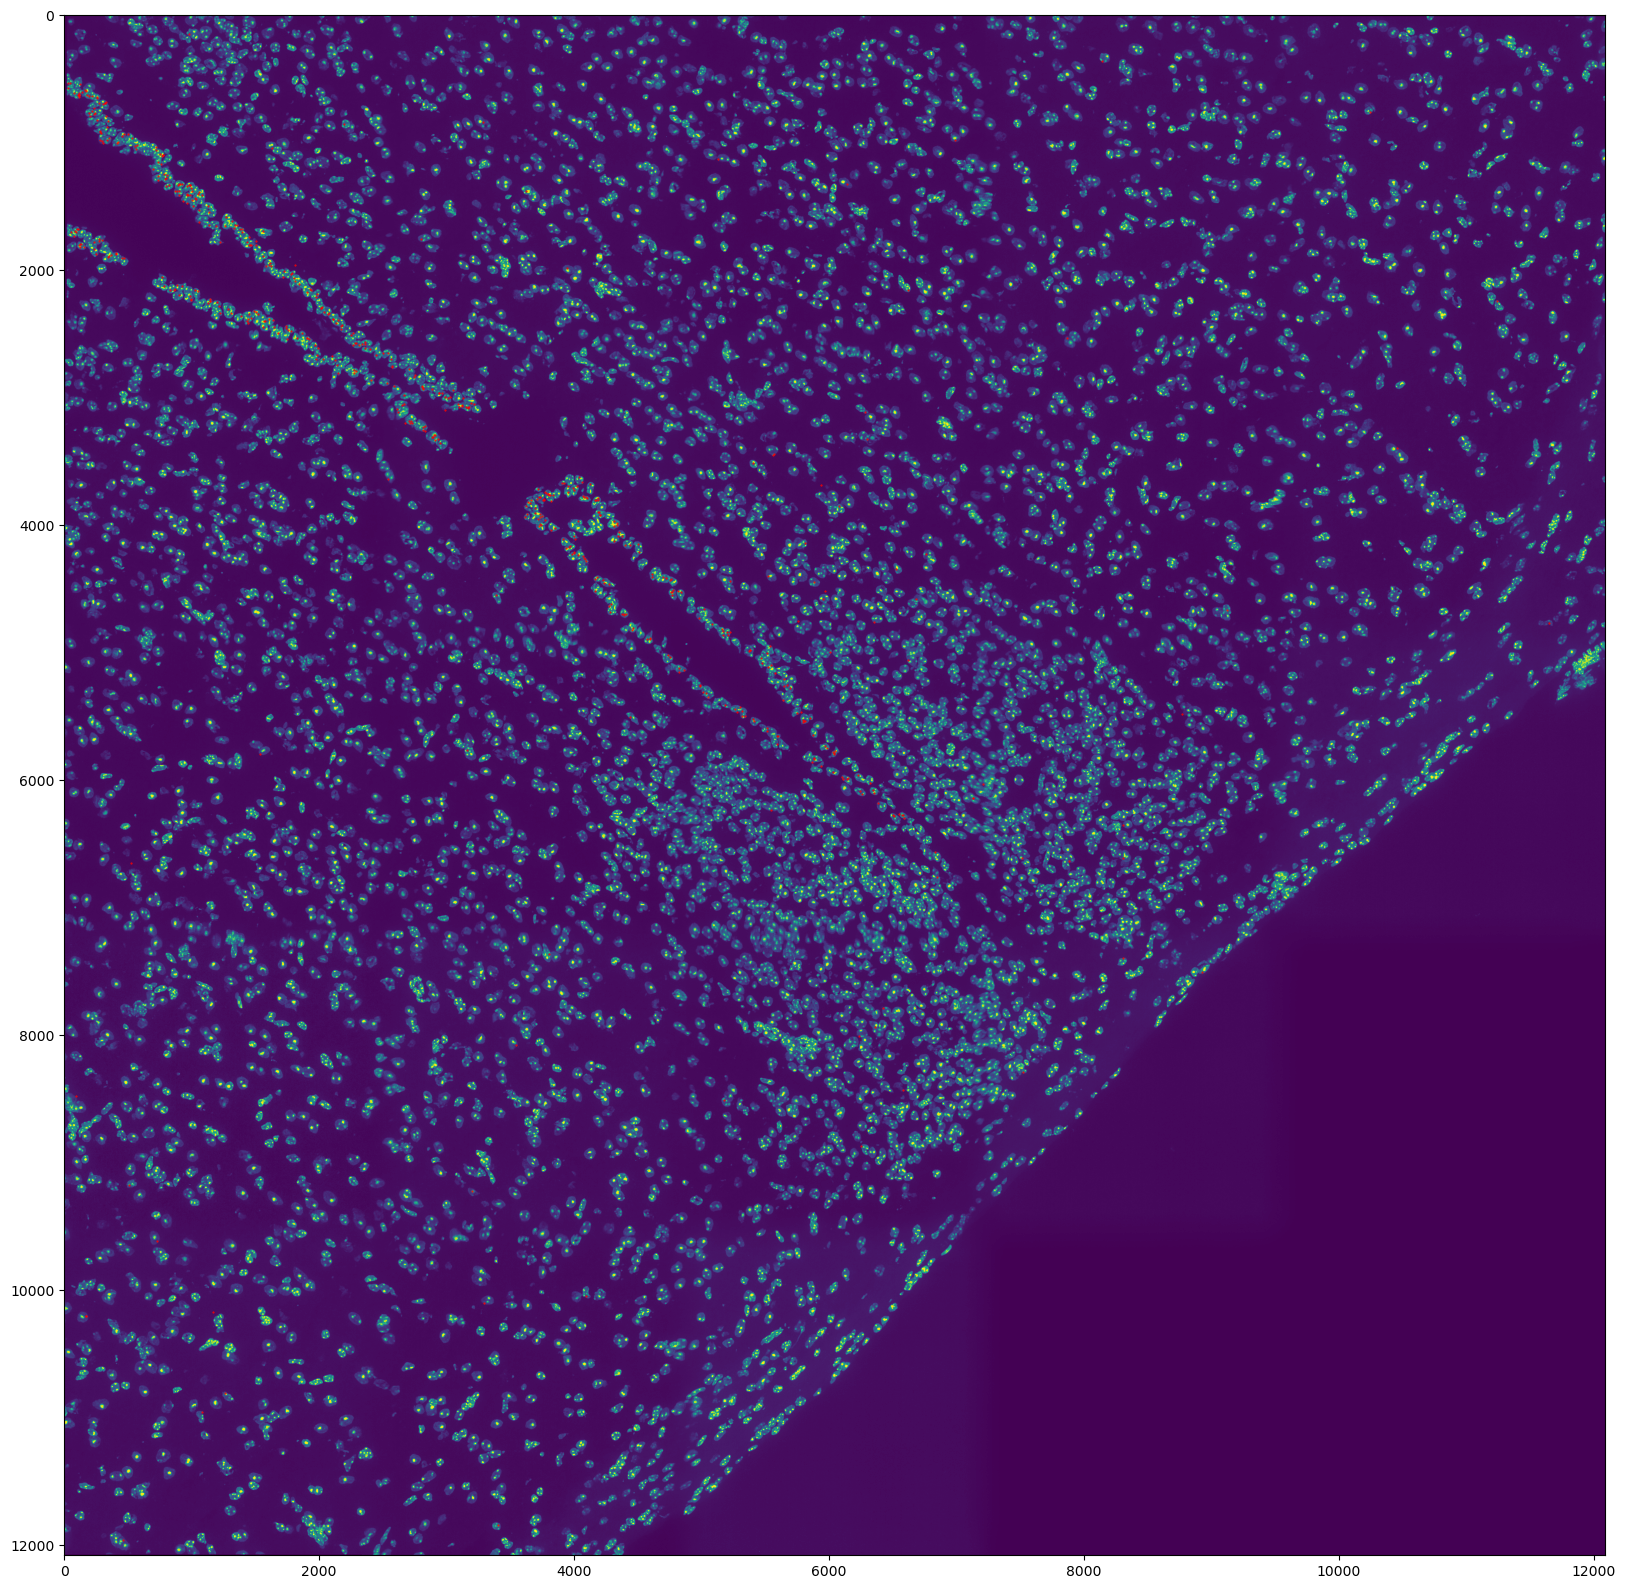

In [34]:
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(overlay)
plt.plot(current_points[:, 1], current_points[:, 0], 'r.', markersize=1)
